# Exploring Decision Tree

In [33]:
import pandas as pd
import numpy as np
## imports from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
## import matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mushroom_data = pd.read_csv('mushrooms.csv')  ## reading the mushroom data

In [3]:
mushroom_data[0:5]  ## Show the first 5 lines to make sure that the file is read correctly

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom_data.info()
##mushroom_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Checking the data for number of unique values

In [5]:
cls_unq = mushroom_data['class'].value_counts()
type(cls_unq)
print(cls_unq)

e    4208
p    3916
Name: class, dtype: int64


In [6]:
def column_split(data):
    columns = data.columns
    unq_cnt = []

    for c in columns:
        cnt = data[c].value_counts()
        unq_cnt.append(cnt)

    return(unq_cnt)

split = column_split(mushroom_data)
split

[e    4208
 p    3916
 Name: class, dtype: int64,
 x    3656
 f    3152
 k     828
 b     452
 s      32
 c       4
 Name: cap-shape, dtype: int64,
 y    3244
 s    2556
 f    2320
 g       4
 Name: cap-surface, dtype: int64,
 n    2284
 g    1840
 e    1500
 y    1072
 w    1040
 b     168
 p     144
 c      44
 u      16
 r      16
 Name: cap-color, dtype: int64,
 f    4748
 t    3376
 Name: bruises, dtype: int64,
 n    3528
 f    2160
 y     576
 s     576
 a     400
 l     400
 p     256
 c     192
 m      36
 Name: odor, dtype: int64,
 f    7914
 a     210
 Name: gill-attachment, dtype: int64,
 c    6812
 w    1312
 Name: gill-spacing, dtype: int64,
 b    5612
 n    2512
 Name: gill-size, dtype: int64,
 b    1728
 p    1492
 w    1202
 n    1048
 g     752
 h     732
 u     492
 k     408
 e      96
 y      86
 o      64
 r      24
 Name: gill-color, dtype: int64,
 t    4608
 e    3516
 Name: stalk-shape, dtype: int64,
 b    3776
 ?    2480
 e    1120
 c     556
 r     192
 Name: 

#### Label Encoding categorical features and labels

In [7]:
# Encode categorical features
label_encoder_features = LabelEncoder()
for column in mushroom_data.columns[1:]:
    mushroom_data[column] = label_encoder_features.fit_transform(mushroom_data[column])

print(mushroom_data[:5])

# Encode categorical label
label_encoder_labels = LabelEncoder()
mushroom_data['class'] = label_encoder_labels.fit_transform(mushroom_data['class'])

print(mushroom_data[:5])

  class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0     p          5            2          4        1     6                1   
1     e          5            2          9        1     0                1   
2     e          0            2          8        1     3                1   
3     p          5            3          8        1     6                1   
4     e          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0               

#### Dividing the dataset into features(X) and label(Y)

In [8]:
X = mushroom_data.iloc[ : ,1:23]
X[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
Y = mushroom_data['class']
Y[0:5]

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

#### Dividing the set into Train-Test in 70-30

In [10]:
y = mushroom_data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = y, random_state = 0) 

In [11]:
print(Y_train.value_counts())
print(Y_test.value_counts())

0    2945
1    2741
Name: class, dtype: int64
0    1263
1    1175
Name: class, dtype: int64


#### Creating a tree_sweep function to run the tree with different parameters to find the optimal tree

In [24]:
def tree_sweep(X_train, X_test, Y_train, Y_test, size, purity):
    ## creating an instance of the DecisionTreeClassifier
    DTcls = DecisionTreeClassifier(criterion = 'entropy'
                                  ,min_samples_split = size
                                  ,min_impurity_decrease = purity)
    
    ## Feeding the Train dataset to instance of DTcls 
    DTcls.fit(X_train,Y_train)
    
    # Prediction on Test Data
    preds_test = DTcls.predict(X_test)
    
    # Getting the TEST accuracy with 
    test_acc = accuracy_score(Y_test, preds_test)
    
    # Prediction on Train Data
    preds_train = DTcls.predict(X_train)
    
    # Getting the TEST accuracy with 
    train_acc = accuracy_score(Y_train, preds_train)
    
    # return the calculated test and train accuracy
    return(train_acc, test_acc)

#### We will sweep the size and purity in the tree parameters 

In [25]:
Tree_Sweep = {'size':[],
              'purity':[],
              'training_accuracy':[],
              'test_accuracy':[]}

size   = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
purity = [60, 65, 70, 75, 80, 85, 90, 95]

In [26]:
for s in size:
    for p in purity:
        Tree_Sweep['size'].append(s)
        Tree_Sweep['purity'].append(p)
        TrAcc, TsAcc = tree_sweep(X_train
                                 ,X_test
                                 ,Y_train
                                 ,Y_test
                                 ,s
                                 ,p)
        Tree_Sweep['training_accuracy'].append(TrAcc)
        Tree_Sweep['test_accuracy'].append(TsAcc)

# Write the Tree_Sweep file
file_df_list = pd.DataFrame.from_dict(Tree_Sweep)
file_df_list.to_csv('Tree_Sweep.csv', index=False, sep=',')


In [29]:
file_df_list['Test-Train Acc'] = file_df_list['test_accuracy']/ file_df_list['training_accuracy']

In [30]:
file_df_list['Test-Train Acc'][:5]

0    1.00021
1    1.00021
2    1.00021
3    1.00021
4    1.00021
Name: Test-Train Acc, dtype: float64

##### The values have not shown much change as the hyper parameters used have not allowed the tree to change/ divide.

In [31]:
df = file_df_list

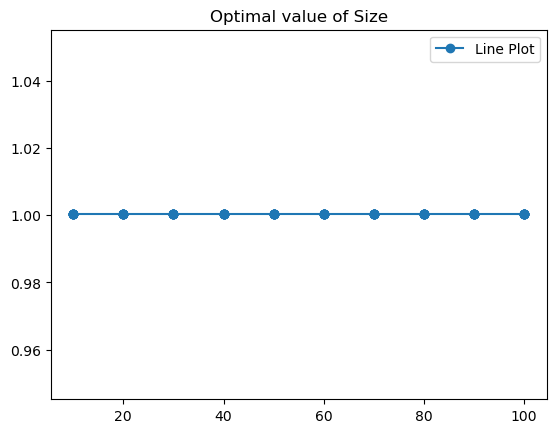

In [35]:
# Plot a basic line graph
plt.plot(df['size'],df['Test-Train Acc'],  marker='o', label='Line Plot')

plt.title('Optimal value of Size')

# Add legend
plt.legend()

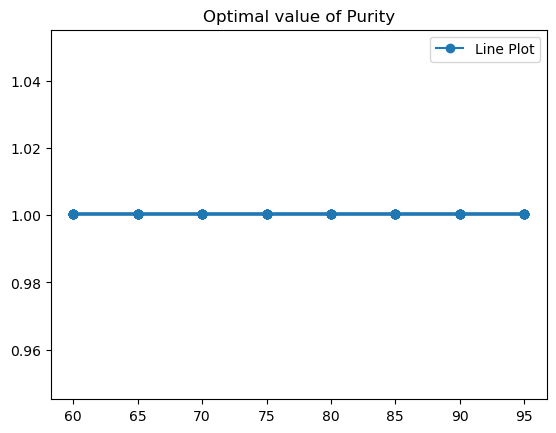

In [36]:
# Plot a basic line graph
plt.plot(df['purity'], df['Test-Train Acc'],  marker='o', label='Line Plot')

plt.title('Optimal value of Purity')

# Add legend
plt.legend()

#### The Tree created is not the optimal one. We have a 58% accuracy which is not good. the hyper parameters when tweaked had no impact on the tree creation, the data cannot be divided to represent better.
#### The graph above is supposed to show a upward climb and then a fall, thus giving us the optimal purity level and similarly the optimal size. But, we get a flat line, showing that for all values of size and purity, the information from the model is constant.